# LIDC XML Nodule Count Verification

This notebook reads an LIDC XML file, extracts all unique nodule IDs, and verifies the total nodule count. Optionally, it visualizes the nodule distribution.

In [4]:
import xml.etree.ElementTree as ET
import os
import matplotlib.pyplot as plt

In [5]:
# Specify the path to your LIDC XML file
xml_path = os.path.join('INPUT', '078.xml')  # Change filename as needed

# Parse the XML file
try:
    tree = ET.parse(xml_path)
    root = tree.getroot()
    print(f"Successfully loaded: {xml_path}")
except Exception as e:
    print(f"Error loading XML file: {e}")

Successfully loaded: INPUT\078.xml


In [6]:
# Extract all unique nodule IDs
ns = {'lidc': 'http://www.nih.gov'}
nodule_ids = set()
for nodule in root.findall('.//lidc:unblindedReadNodule', ns):
    nodule_id_elem = nodule.find('lidc:noduleID', ns)
    if nodule_id_elem is not None:
        nodule_ids.add(nodule_id_elem.text.strip())

nodule_ids = sorted(nodule_ids)
nodule_count = len(nodule_ids)

In [7]:
print(f"Total unique nodules in XML: {nodule_count}")
print("Nodule IDs:")
for nid in nodule_ids:
    print(nid)

Total unique nodules in XML: 33
Nodule IDs:
0
10
11
15
17
2
3
5
6
8
9
IL057_127062
IL057_127069
IL057_127072
IL057_127076
IL057_127104
IL057_127105
MI014_16317
MI014_16330
MI014_16333
MI014_16350
MI014_16351
MI014_16360
MI014_16363
Nodule 001
Nodule 002
Nodule 003
Nodule 004
Nodule 005
Nodule 006
Nodule 007
Nodule 008
Nodule 009


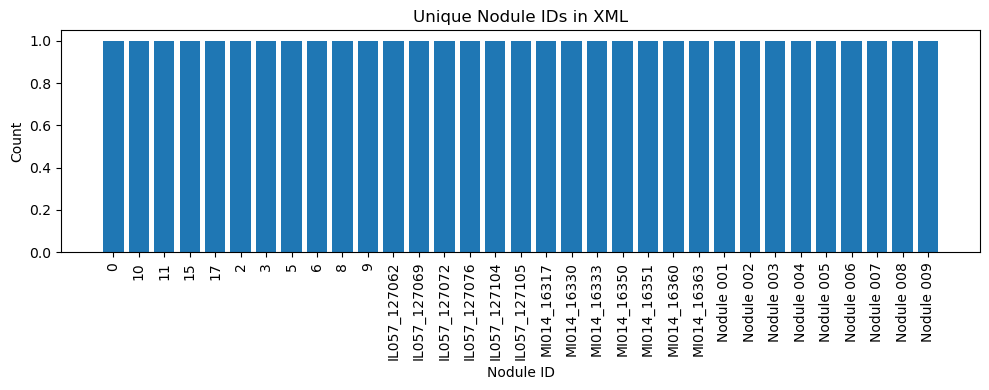

In [8]:
# Optional: Visualize nodule distribution (bar chart of nodule IDs)
plt.figure(figsize=(10, 4))
plt.bar(range(1, nodule_count+1), [1]*nodule_count, tick_label=nodule_ids)
plt.xlabel('Nodule ID')
plt.ylabel('Count')
plt.title('Unique Nodule IDs in XML')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [9]:
# Assert and warn if the nodule count is not 14
expected_nodule_count = 14
if nodule_count != expected_nodule_count:
    print(f"WARNING: Expected {expected_nodule_count} nodules, but found {nodule_count}.")
else:
    print("Nodule count matches expected value (14).")